IMPORTING ALL THE MODULES
-

In [52]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dataset = '../MP 3rd SEM/Dataset'

CONVERTING DATASET TO NUMPY ARRAY
-

In [43]:
i = 0
label = [] # list where image label will be stored
facesample = [] # list where images will be stored as numpy

for name in os.listdir(dataset):
    i = i + 1
    for pics in os.listdir(f"{dataset}/{name}"):
        img = cv.imread(str(f"{dataset}/{name}/{pics}"),1)
        
        img = cv.resize(img,(150,150)) # resizing the image for efficiency
        
        img_numpy = np.array(img,'uint8')
        id = i
        label.append(np.array(id))
        facesample.append(img)

In [44]:
train_face = np.asarray(facesample) # Numpy array where all the images are
label = np.array(label,'uint8') # Numpy array where labels are stored

In [45]:
## Categorize the label in number of test cases ##
## We do this so that the label become binary in nature, which is easy and efficient ##

from keras.utils import to_categorical # Keras library 

label = to_categorical(label)

In [46]:
train_face = train_face/255 # Normalize the data i.e every pixel between 0 to 1

In [50]:
from sklearn.utils import shuffle

In [51]:
final_face , final_label = shuffle(train_face,label)

[0. 1. 0. 0. 0.]


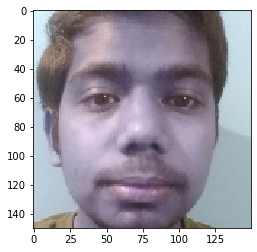

In [53]:
plt.imshow(final_face[98])
print(final_label[98])

-----------

# BUILDING A MODEL (CREATING NUREAL NETWORK)

In [54]:
from keras.models import Sequential #type of network will be sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten # Name of the different layers

In [69]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(150, 150, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(150, 150, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(150, 150, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(150, 150, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(180, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, i.e Number of person
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [70]:
model.fit(final_face,final_label,verbose=1,epochs=20)

Epoch 1/20
227/227 [==============================] - 27s 120ms/step - loss: 9.5308 - accuracy: 0.2467
Epoch 2/20
227/227 [==============================] - 28s 122ms/step - loss: 1.7522 - accuracy: 0.4758
Epoch 3/20
227/227 [==============================] - 27s 120ms/step - loss: 0.9504 - accuracy: 0.7269
Epoch 4/20
227/227 [==============================] - 26s 112ms/step - loss: 0.7470 - accuracy: 0.7445
Epoch 5/20
227/227 [==============================] - 26s 116ms/step - loss: 1.2643 - accuracy: 0.6872
Epoch 6/20
227/227 [==============================] - 25s 111ms/step - loss: 0.4213 - accuracy: 0.8414
Epoch 7/20
227/227 [==============================] - 25s 108ms/step - loss: 0.5763 - accuracy: 0.8502
Epoch 8/20
227/227 [==============================] - 25s 109ms/step - loss: 0.8199 - accuracy: 0.7225
Epoch 9/20
227/227 [==============================] - 28s 124ms/step - loss: 0.3245 - accuracy: 0.8899
Epoch 10/20
227/227 [==============================] - 24s 106ms/step - l

In [71]:
model.evaluate(final_face,final_label)

227/227 [==============================] - 4s 16ms/step


[3.706206960503206e-05, 1.0]

In [72]:
model.save('final_SEM3_MP.h5')

In [60]:
from tensorflow.keras.models import load_model

In [61]:
pre = load_model('final_SEM3_MP.h5')

In [ ]:
img = cv.imread('')